# Текст задания

Уважаемые коллеги, на учебном сервере, при помощи данного блокнота, вам необходимо выполнить задание по анализу данных.

Приложенный к заданию блокнот загрузите на сервер вместе с вашим файлом с данными.

Задание выполняйте на сервере. В виртуальном классе разместите только свой логин, когда оно будет готово и, если необходимо, ваши комментарии. Задание разбито на следующие этапы:
1. Загрузка данных
1. Преобразование данных (если необходимо)
1. Первичный анализ данных и поиск закономерностей
1. Кластеризация
1. Построение объясняющей модели машинного обучения

Для получения зачета и минимальных 76 баллов достаточно выполнить первые три пункта. При выполненнии следуйте комментариям в блокноте, используйте ранее отправленные материалы и видео. Также можете в любое время обращаться за консультациями.

# Загрузка данных

В ячейке ниже укажите файл, который необходимо загрузить (он должен быть также загружен на сервер в папке, где находится блокнот) и при необходимости имя листа (если больше чем один). Тогда команда будет выглядеть так:

```python
df=pd.read_excel('Credits.xlsx', engine='openpyxl', sheet_name='Лист1')
```

Где `sheet_name` - параметр, который указывает на название листа.

Сам файл с данными желательно MS Excel в виде простой таблицы, где первая строка - заголовок. Но это не обязательно, обратитесь за консультацией и мы сможем загрузить практически любой формат.

In [1]:
# служебный код, выполните, чтобы избегать лишних предупреждений
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='openpyxl')

In [2]:
import pandas as pd
df=pd.read_excel('Credits.xlsx', engine='openpyxl')

In [3]:
# выводит три случайные строчки файла с данными
df.sample(3, random_state=42)

,Дата рождения,Образование,Среднемесячный подтвержденный доход,Среднемесячный дополнительный доход,Среднемесячные расходы,Среднемесячный доход семьи,Работа по трудовому договору,Категория должности,Вид деятельности компании,Количество сотрудников в компании,...,Запрошенная сумма,Тип кредита,Дата Выдачи,Сумма выдачи,Процентная ставка,Срок,Количество созаемщиков,Одобрение кредита,Сумма просрочки,Дней просрочки
7449,11.04.1962,Среднее специальное,24000.0,18000.0,0.0,68000.0,Пенсионер,NaN,NaN,NaN,...,125000.0,Потреб,2015-12-29,162500.0,22.75,30.0,0.0,1,0.0,0.0
12004,11.07.1962,Незаконченное высшее,20000.0,0.0,0.0,20000.0,Без сроkа (постоянная занятость),Владелец предприятия/ген.Директор/Главный бухг...,Оптовая / розничная торговля (уточните),До 10,...,300000.0,Потреб,NaT,NaN,NaN,NaN,NaN,0,NaN,NaN
28142,21.02.1978,Высшее,28000.0,0.0,0.0,55000.0,Без сроkа (постоянная занятость),Специалист,Строительство,31-50,...,2050000.0,Ипотека,2016-02-05,2032000.0,11.40,180.0,1.0,0,0.0,0.0


In [4]:
# выводит информацию о датасете, типе переменных и количестве ненулевых значений
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46551 entries, 0 to 46550
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Дата рождения                        46549 non-null  object        
 1   Образование                          44863 non-null  object        
 2   Среднемесячный подтвержденный доход  46542 non-null  float64       
 3   Среднемесячный дополнительный доход  46542 non-null  float64       
 4   Среднемесячные расходы               46542 non-null  float64       
 5   Среднемесячный доход семьи           46542 non-null  float64       
 6   Работа по трудовому договору         46542 non-null  object        
 7   Категория должности                  32932 non-null  object        
 8   Вид деятельности компании            32911 non-null  object        
 9   Количество сотрудников в компании    32931 non-null  object        
 10  Срок работ

При помощи методов `to_numeric` и `to_datetime` - преобразуйте столбцы к нужным форматам. Пример ниже.

Можете копировать код и добавлять только названия столбцов.

In [5]:
# преобразование к дате
df['Дата рождения']=pd.to_datetime(df['Дата рождения'], errors='coerce')

In [6]:
# преобразование к числу
df['Дней просрочки']=pd.to_numeric(df['Дней просрочки'], errors='coerce')

# Первичный анализ данных

Постройте пару графиков и гистограмм, чтобы выполнить необходимый минимум. Но! Пожалуйста, в виде комментариев или текста в формате Markdown оставьте комментарии (пояснения).

В примерах можно изменять только названия столбцов.

Построим гистограмму.

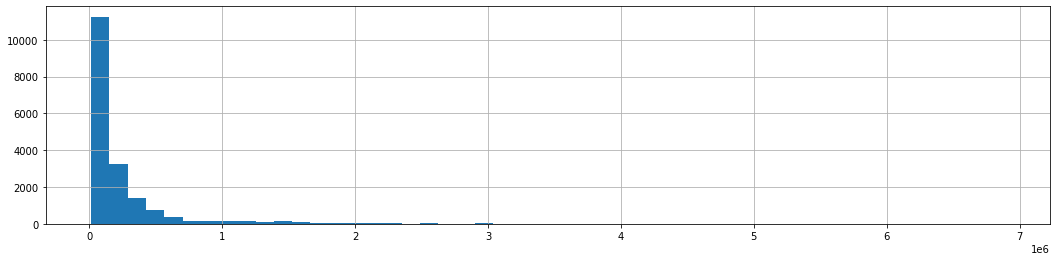

In [7]:
df['Сумма выдачи'].hist(figsize=(18,4), bins=50);

Понять, где в данных есть выбросы и установить фильтр, чтобы увидеть закономерности можно при помощи метода ``describe()`.

In [8]:
df.describe()

,Среднемесячный подтвержденный доход,Среднемесячный дополнительный доход,Среднемесячные расходы,Среднемесячный доход семьи,Количество рабочих мест за 3 года,Количесво членов семьи,Запрошенный срок кредита,Запрошенная сумма,Сумма выдачи,Процентная ставка,Срок,Количество созаемщиков,Одобрение кредита,Сумма просрочки,Дней просрочки
count,4.654200e+04,46542.000000,46542.000000,4.654200e+04,32921.000000,46533.000000,46551.000000,4.655100e+04,1.822400e+04,18224.000000,18224.000000,18224.000000,46551.000000,1.809600e+04,18096.000000
mean,2.706172e+04,7794.464391,1168.872591,4.942145e+04,1.187752,1.828444,56.987798,3.074871e+05,2.333586e+05,21.571982,51.922904,0.142395,0.370905,1.058675e+03,2.582781
std,4.667881e+04,16905.636866,7070.643945,7.661502e+04,0.650182,0.862824,49.682706,5.111167e+05,3.695586e+05,3.264470,42.331184,0.349464,0.483052,1.885667e+04,22.795817
min,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,1.000000,3.000000,1.500000e+04,1.500000e+04,11.400000,3.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,1.100000e+04,0.000000,0.000000,2.500000e+04,1.000000,1.000000,36.000000,6.466900e+04,5.500000e+04,20.500000,24.000000,0.000000,0.000000,0.000000e+00,0.000000
50%,2.000000e+04,0.000000,0.000000,4.000000e+04,1.000000,2.000000,60.000000,1.500000e+05,1.100000e+05,22.450000,60.000000,0.000000,0.000000,0.000000e+00,0.000000
75%,3.200000e+04,10000.000000,0.000000,6.000000e+04,1.000000,2.000000,60.000000,3.450000e+05,2.350000e+05,22.950000,60.000000,0.000000,1.000000,0.000000e+00,0.000000
max,5.000000e+06,980000.000000,250000.000000,8.000000e+06,41.000000,7.000000,360.000000,1.500000e+07,6.884200e+06,27.500000,361.000000,1.000000,1.000000,1.396569e+06,361.000000


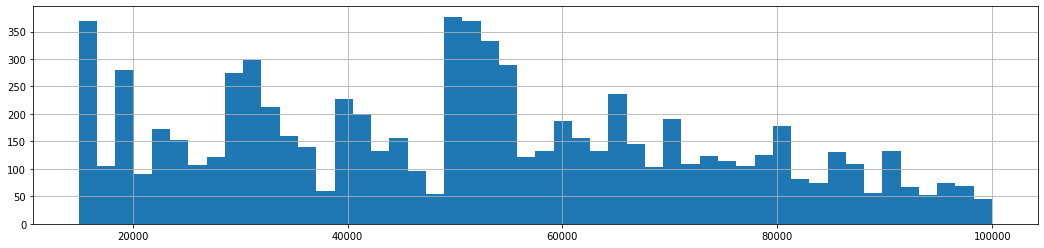

In [9]:
# такая же диаграмма с фильтром по значению, те отобразить меньше чем
df[df['Сумма выдачи']<100000]['Сумма выдачи'].hist(figsize=(18,4), bins=50);

Построим парные матрицы рассеяния по всем числовым полям. Попробуйте найти закономерности. Выбросы могут "маскировать" закономерности. Правильно выявить все выбросы и удалить их из датасета, конечно, разобравшись, что это за события.

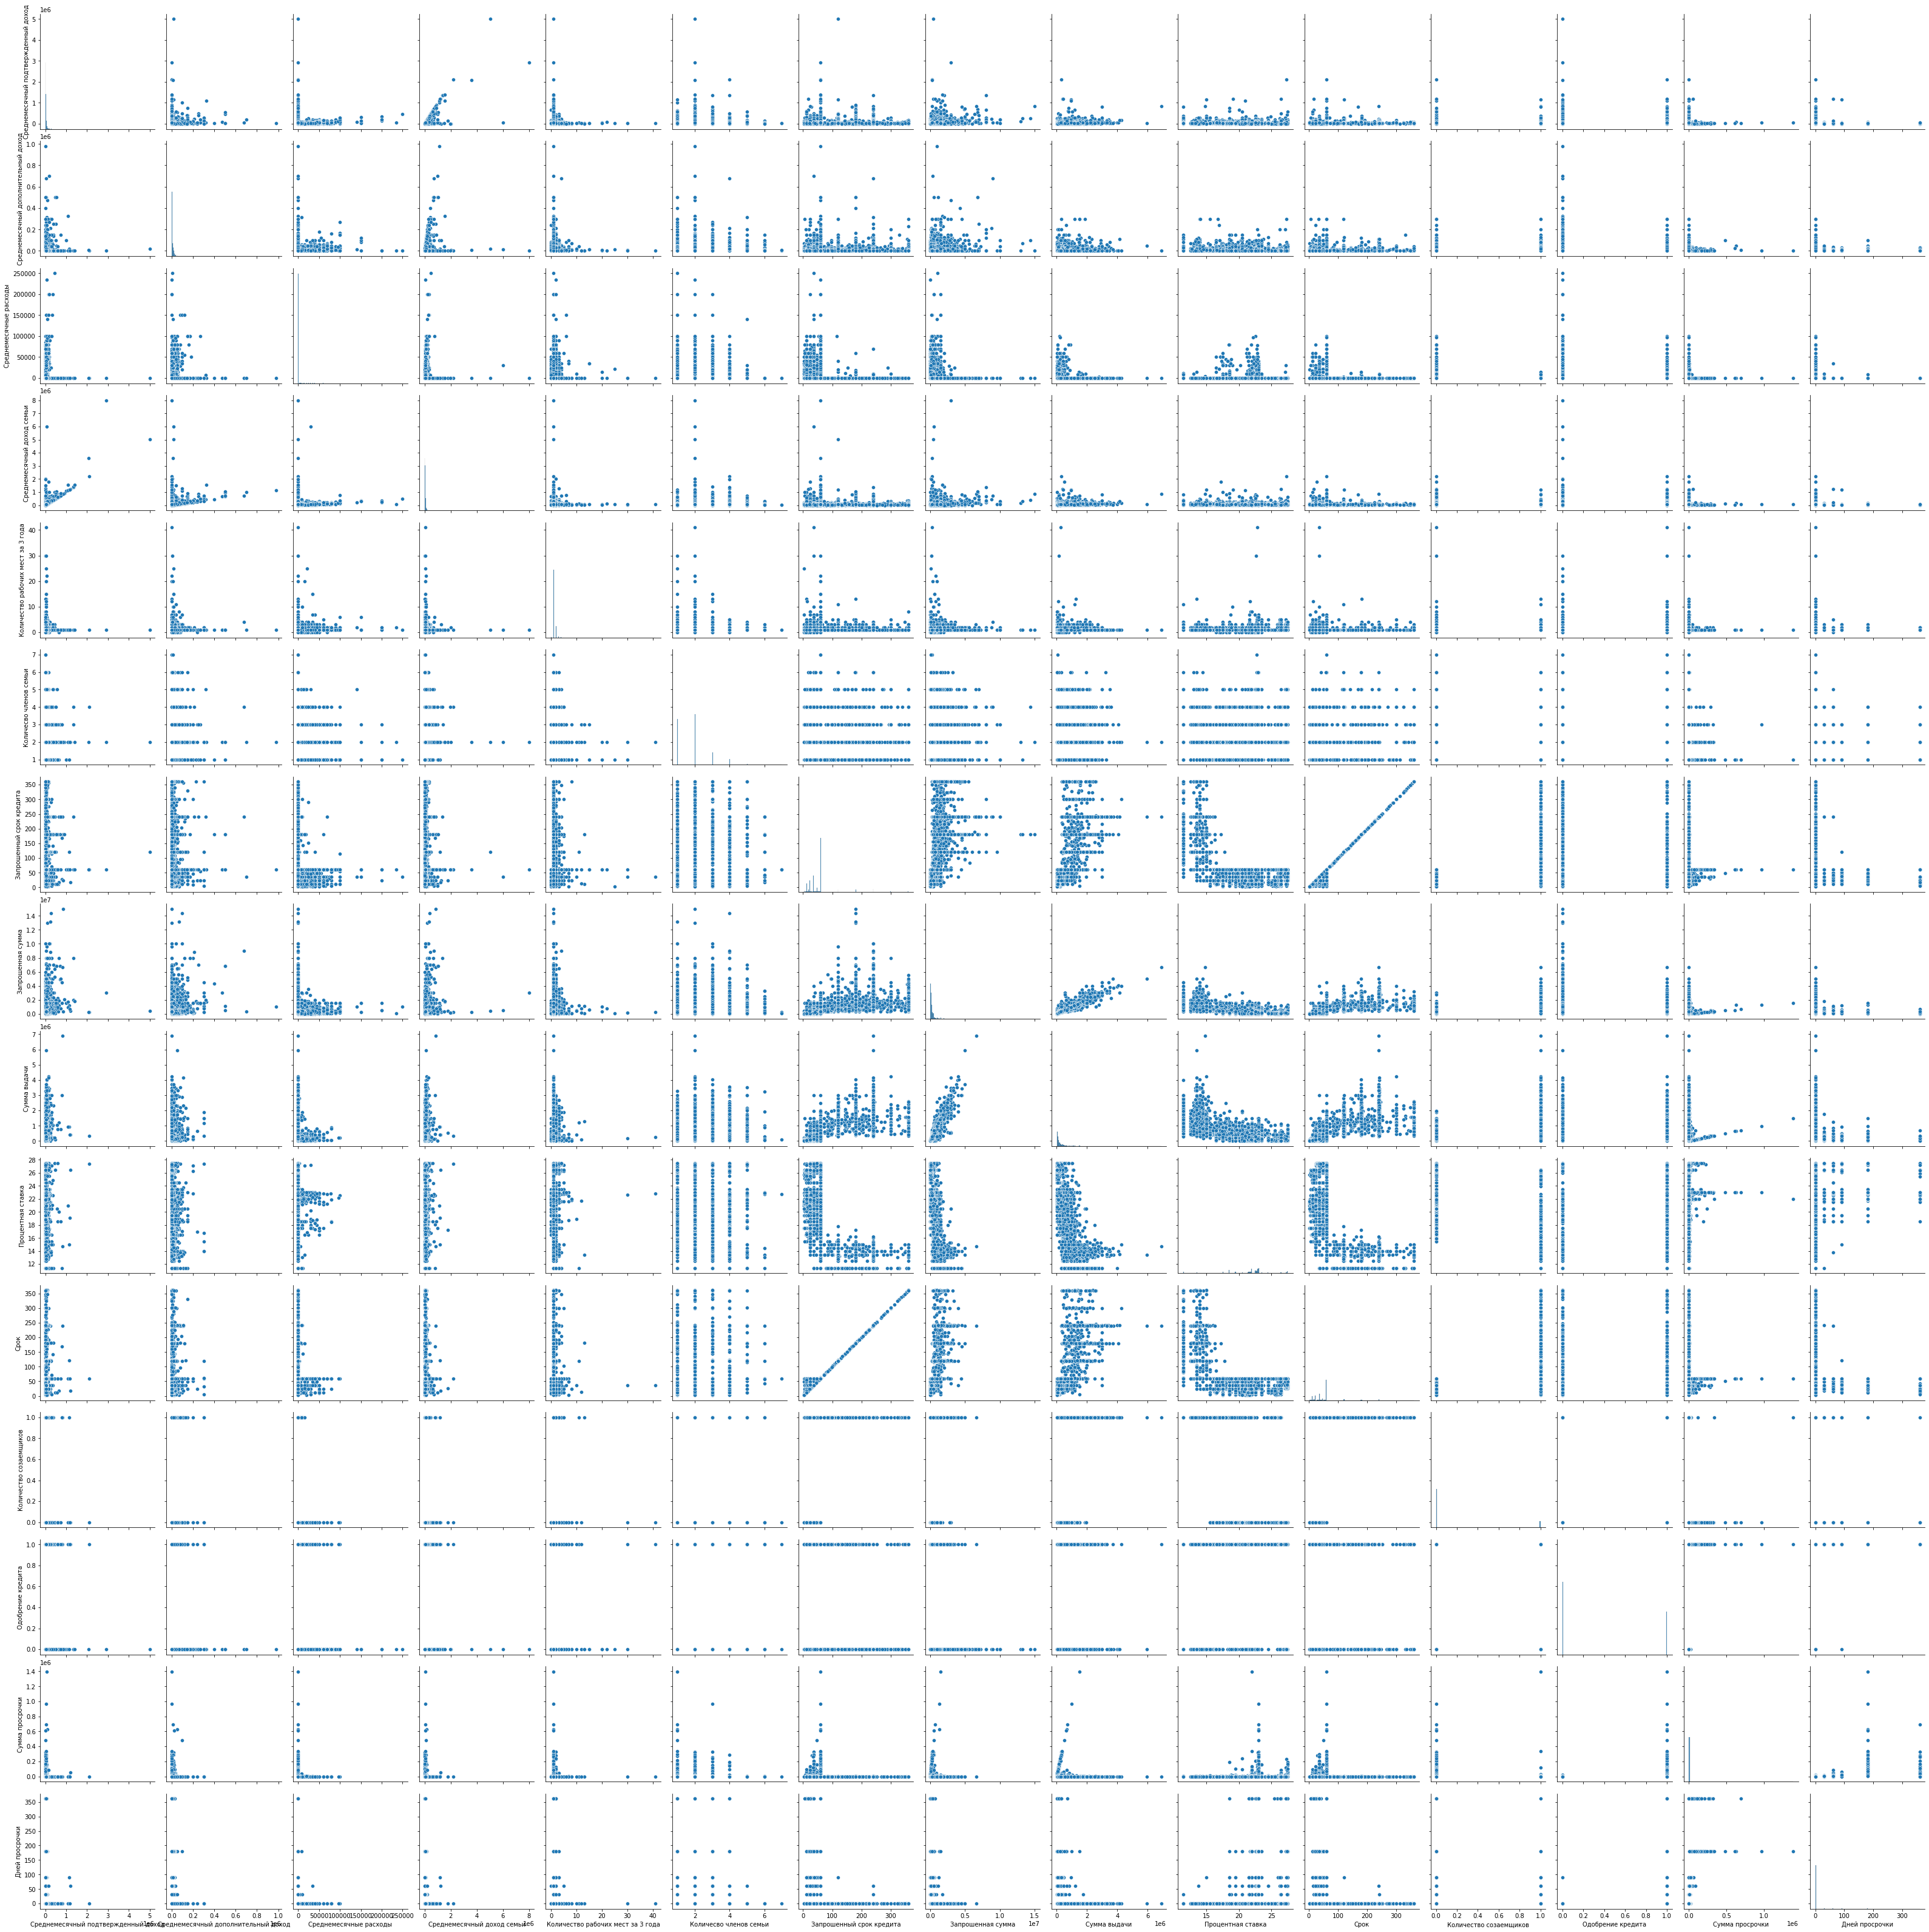

In [10]:
#операция может занять некоторое время
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df,height=3, diag_kws={"bins": "sqrt"});

Попробуйте выявить закономерности через расчет коэффициентов корреляции.

In [11]:
df.corr()

,Среднемесячный подтвержденный доход,Среднемесячный дополнительный доход,Среднемесячные расходы,Среднемесячный доход семьи,Количество рабочих мест за 3 года,Количесво членов семьи,Запрошенный срок кредита,Запрошенная сумма,Сумма выдачи,Процентная ставка,Срок,Количество созаемщиков,Одобрение кредита,Сумма просрочки,Дней просрочки
Среднемесячный подтвержденный доход,1.000000,0.069698,0.082002,0.762896,-0.014278,0.091383,0.095892,0.301962,0.322357,-0.177303,0.116341,0.073824,-0.026129,0.018423,0.001805
Среднемесячный дополнительный доход,0.069698,1.000000,0.095374,0.288545,0.021579,0.032543,0.065670,0.173686,0.111685,-0.052863,0.063000,-0.006431,-0.044669,0.014160,-0.003858
Среднемесячные расходы,0.082002,0.095374,1.000000,0.093140,0.057181,-0.032148,-0.035542,0.014640,0.004001,-0.006598,-0.007932,-0.030655,-0.096613,-0.004099,-0.006425
Среднемесячный доход семьи,0.762896,0.288545,0.093140,1.000000,-0.007577,0.181966,0.075732,0.258325,0.301242,-0.169871,0.115443,0.040184,-0.026791,0.010120,-0.010550
Количество рабочих мест за 3 года,-0.014278,0.021579,0.057181,-0.007577,1.000000,-0.017576,0.028873,0.023007,0.032375,0.012151,0.042177,0.026725,-0.043397,-0.000885,0.013371
Количесво членов семьи,0.091383,0.032543,-0.032148,0.181966,-0.017576,1.000000,0.135105,0.135982,0.150349,-0.109070,0.164595,0.057410,0.021512,-0.007795,-0.013408
Запрошенный срок кредита,0.095892,0.065670,-0.035542,0.075732,0.028873,0.135105,1.000000,0.656028,0.733472,-0.525331,0.993714,0.536947,-0.159846,-0.001781,-0.025131
Запрошенная сумма,0.301962,0.173686,0.014640,0.258325,0.023007,0.135982,0.656028,1.000000,0.954143,-0.596760,0.727777,0.514687,-0.145304,0.026698,-0.026876
Сумма выдачи,0.322357,0.111685,0.004001,0.301242,0.032375,0.150349,0.733472,0.954143,1.000000,-0.616175,0.732740,0.526558,-0.423595,0.023760,-0.027630
Процентная ставка,-0.177303,-0.052863,-0.006598,-0.169871,0.012151,-0.109070,-0.525331,-0.596760,-0.616175,1.000000,-0.522274,-0.480651,0.408429,0.028225,0.063669


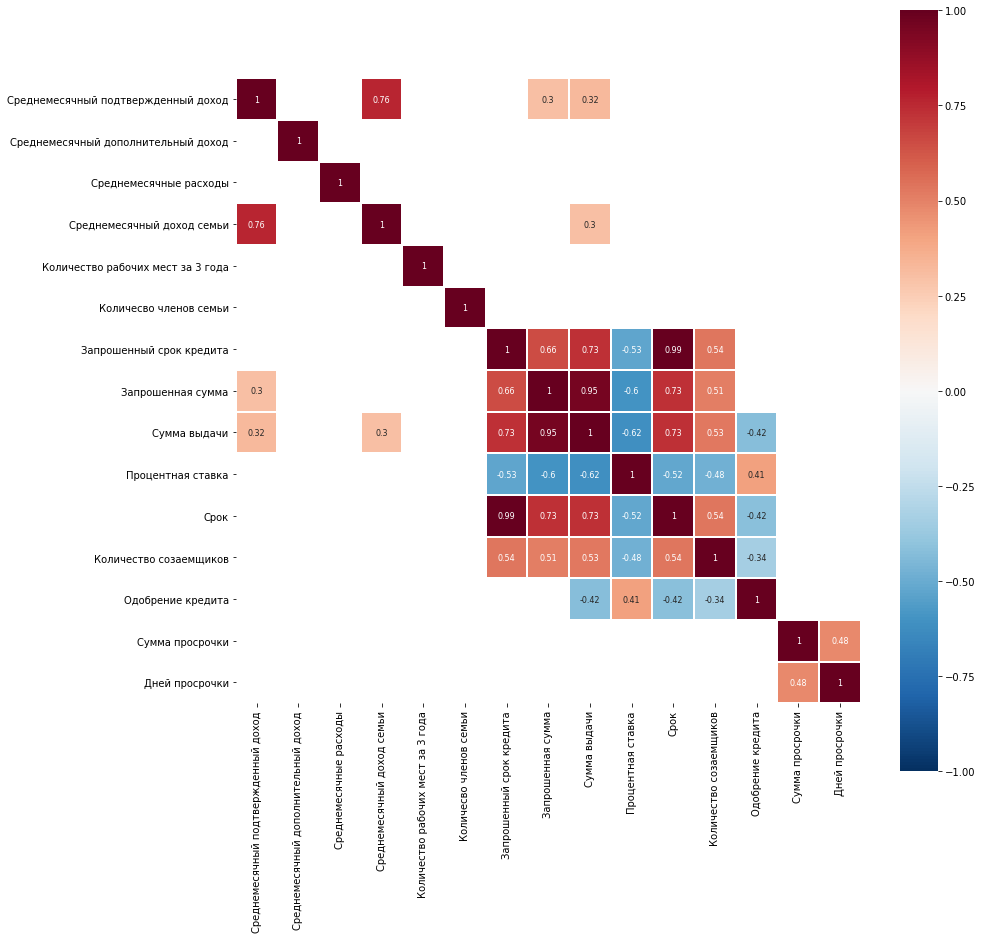

In [12]:
# тепловая карта по корреляции
corr = df.corr()
plt.figure(figsize=(14, 14))
sns.heatmap(corr[(corr >= 0.3) | (corr <= -0.3)],
            cmap="RdBu_r", vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

Можно попробовать в рамках исследований выполнить группировки. Например, с каким образованием чаще берут кредиты:

In [13]:
df.groupby('Образование')['Образование'].count()

Образование
Второе высшее             540
Высшее                  18469
Незаконченное высшее     1104
Ниже среднего              78
Среднее                  6814
Среднее специальное     17769
Ученая степень / МВА       89
Name: Образование, dtype: int64

Укажите, какие закономерности вы увидели? 

**<span style="color:green"> И поздравляю, вы добрались до первой незгораемой оценки в 76 баллов. </span>** Считайте, что зачет получен. Но предлагаю проследовать дальше. Ведь не все так сложно? 

# Кластеризация

Команда ниже выведет все названия столбцов. Скопируйте их в переменную col.

Используйте только числовые столбцы!!!

In [14]:
df.columns

Index(['Дата рождения', 'Образование', 'Среднемесячный подтвержденный доход',
       'Среднемесячный дополнительный доход', 'Среднемесячные расходы',
       'Среднемесячный доход семьи', 'Работа по трудовому договору',
       'Категория должности', 'Вид деятельности компании',
       'Количество сотрудников в компании', 'Срок работы в организации',
       'Количество рабочих мест за 3 года', 'Семейное положение',
       'Количесво членов семьи', 'Наличие детей', 'Запрошенный срок кредита',
       'Запрошенная сумма', 'Тип кредита', 'Дата Выдачи', 'Сумма выдачи',
       'Процентная ставка', 'Срок', 'Количество созаемщиков',
       'Одобрение кредита', 'Сумма просрочки', 'Дней просрочки'],
      dtype='object')

In [15]:
col=['Среднемесячный подтвержденный доход', 'Среднемесячные расходы', 'Запрошенный срок кредита', 'Запрошенная сумма']

In [16]:
# Удалим все строки, в которых есть пропуски и присвоим таблицу новой переменной

df_new=df[col].dropna(how='any', axis=0)
df_new.sample(2)

,Среднемесячный подтвержденный доход,Среднемесячные расходы,Запрошенный срок кредита,Запрошенная сумма
23216,6400.0,0.0,12,20000.0
43479,12000.0,0.0,30,150000.0


In [17]:
# здесь ничего не меняем
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing

# нормируем данные
data = preprocessing.StandardScaler().fit_transform(df_new) #обратите внимание - только выборка 
data

array([[ 0.49141192, -0.16531523,  0.06068818,  0.58696718],
       [-0.32267072,  0.82470424,  0.06068818, -0.46465113],
       [-0.17699278,  2.66331184,  0.06068818, -0.40595921],
       ...,
       [ 0.27717964, -0.16531523,  1.26849171,  2.33299696],
       [ 0.15935189, -0.16531523, -0.341913  , -0.17119154],
       [ 0.49141192, -0.16531523,  0.06068818, -0.04206932]])

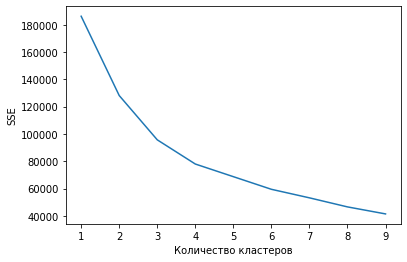

In [18]:
# ничего не меняем, выполнение занимает какое то время
# определяем количество кластеров
from sklearn.cluster import KMeans

#метод локтя
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Количество кластеров")
plt.ylabel("SSE")
plt.show()

На графике выше посмотрите, где происходит наибольший слом графика. Как правило, это точка указывает на оптимальное количество кластеров. Но попробуйте провести несколько экспериментов с количеством кластеров. Для этого изменяйте параметр `n_clusters`

In [19]:
from sklearn.cluster import KMeans

# Изменить параметр n_clusters
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter= 1000, n_init= 10, random_state= 3)

y_kmeans = kmeans.fit_predict(data)

In [20]:
#не изменять, результаты кластеризации
df_result=df_new.copy()
df_result['kmeans']=kmeans.labels_
df_analize=df_result.groupby('kmeans')[col].mean()
df_analize=df_result.groupby('kmeans').mean()
df_analize['Count']=df_result.groupby('kmeans')['kmeans'].count()
df_analize

,Среднемесячный подтвержденный доход,Среднемесячные расходы,Запрошенный срок кредита,Запрошенная сумма,Count
kmeans,,,,,
0,2.410534e+04,210.539015,45.155597,2.020589e+05,41871
1,4.849279e+04,65.935673,205.741813,1.573309e+06,3420
2,1.312707e+06,0.000000,117.375000,3.236935e+06,24
3,4.306590e+04,36968.776691,44.858191,3.203068e+05,1227


In [21]:
# измените номер кластера, чтобы увидеть содержимое кластера
df_result[df_result['kmeans']==2]

,Среднемесячный подтвержденный доход,Среднемесячные расходы,Запрошенный срок кредита,Запрошенная сумма,kmeans
128,1011075.60,0.0,60,1500000.00,2
175,700000.00,0.0,240,4900000.00,2
1226,844063.83,0.0,180,15000000.00,2
1813,1350000.00,0.0,240,8000000.00,2
3033,2114932.08,0.0,60,250000.00,2
3373,1089000.00,0.0,60,1750000.00,2
7463,700000.00,0.0,180,6800000.00,2
8127,1200000.00,0.0,17,417693.00,2
9927,805000.00,0.0,28,1500000.00,2
15704,2080935.00,0.0,60,235155.79,2


Можете как то прокоментировать полученные кластера? Есть ли какая то полезная информация для размышления в такой группировке?

# Машинное обучение

Попробуем выделить, какие параметры влияют на некую целевую переменную. Например, сумму выдачи. В переменной `col` укажите столбцы с количественными значениями.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46551 entries, 0 to 46550
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Дата рождения                        46549 non-null  datetime64[ns]
 1   Образование                          44863 non-null  object        
 2   Среднемесячный подтвержденный доход  46542 non-null  float64       
 3   Среднемесячный дополнительный доход  46542 non-null  float64       
 4   Среднемесячные расходы               46542 non-null  float64       
 5   Среднемесячный доход семьи           46542 non-null  float64       
 6   Работа по трудовому договору         46542 non-null  object        
 7   Категория должности                  32932 non-null  object        
 8   Вид деятельности компании            32911 non-null  object        
 9   Количество сотрудников в компании    32931 non-null  object        
 10  Срок работ

In [23]:
df.columns

Index(['Дата рождения', 'Образование', 'Среднемесячный подтвержденный доход',
       'Среднемесячный дополнительный доход', 'Среднемесячные расходы',
       'Среднемесячный доход семьи', 'Работа по трудовому договору',
       'Категория должности', 'Вид деятельности компании',
       'Количество сотрудников в компании', 'Срок работы в организации',
       'Количество рабочих мест за 3 года', 'Семейное положение',
       'Количесво членов семьи', 'Наличие детей', 'Запрошенный срок кредита',
       'Запрошенная сумма', 'Тип кредита', 'Дата Выдачи', 'Сумма выдачи',
       'Процентная ставка', 'Срок', 'Количество созаемщиков',
       'Одобрение кредита', 'Сумма просрочки', 'Дней просрочки'],
      dtype='object')

In [24]:
col=['Среднемесячный подтвержденный доход',
       'Среднемесячные расходы', 'Среднемесячный доход семьи', 
       'Количество рабочих мест за 3 года',
       'Запрошенный срок кредита',
       'Сумма выдачи' ]
df_new=df[col].dropna(how='any', axis=0)
df_new

,Среднемесячный подтвержденный доход,Среднемесячные расходы,Среднемесячный доход семьи,Количество рабочих мест за 3 года,Запрошенный срок кредита,Сумма выдачи
4,16000.00,0.0,40000.00,1.0,60,165000.0
5,20000.00,0.0,20000.00,1.0,60,300000.0
7,80000.00,0.0,80000.00,1.0,60,302000.0
12,46074.38,0.0,77074.38,1.0,60,195000.0
14,35000.00,0.0,100000.00,1.0,60,229000.0
...,...,...,...,...,...,...
46542,40000.00,0.0,49000.00,1.0,23,316000.0
46546,55000.00,0.0,55000.00,1.0,36,150000.0
46547,30000.00,0.0,60000.00,1.0,60,183000.0
46548,40000.00,0.0,90000.00,1.0,120,2000000.0


Укажем целевую и влияющие величины. Можете удалить просто из списка `col` целевую величину.

In [25]:
Y=df_new['Сумма выдачи']
col=['Среднемесячный подтвержденный доход',
       'Среднемесячные расходы', 'Среднемесячный доход семьи', 
       'Количество рабочих мест за 3 года', 
       'Запрошенный срок кредита']
X=df_new[col]

In [26]:
#обучим модель и посмотрим на значимость признака
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

#feature extraction
model = RandomForestRegressor(n_estimators=10, random_state=42)
model.fit(X, Y)

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

ar_f=[]
for f, idx in enumerate(indices):
    ar_f.append([round(importances[idx],4), X.columns[idx]])
print("Значимость признака:")
ar_f.sort(reverse=True)
ar_f

Значимость признака:


[[0.6848, 'Запрошенный срок кредита'],
 [0.1596, 'Среднемесячный подтвержденный доход'],
 [0.1383, 'Среднемесячный доход семьи'],
 [0.0147, 'Количество рабочих мест за 3 года'],
 [0.0026, 'Среднемесячные расходы']]

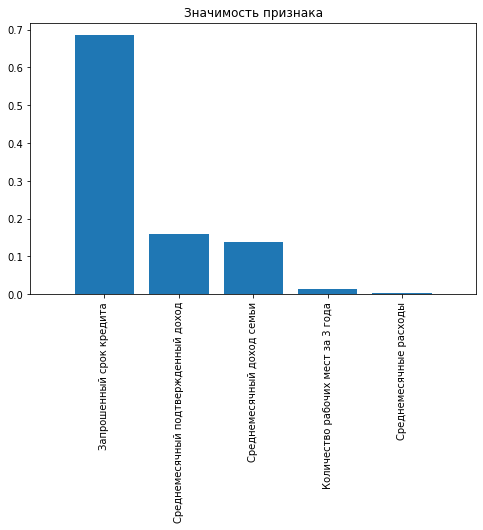

In [27]:
# тоже не графике
d_first = len(X.columns)
plt.figure(figsize=(8, 5))
plt.title("Значимость признака")
plt.bar(range(d_first), importances[indices[:d_first]], align='center')
plt.xticks(range(d_first), np.array(X.columns)[indices[:d_first]], rotation=90)
plt.xlim([-1, d_first]);

In [28]:
# точность нашей модели
from sklearn.metrics import r2_score
r2_score(model.predict(X), Y)

0.8820378387105676

Как вы можете пояснить полченные результаты и насколько согласны с ними?

**Поздравляю! Вы дошли до финала!!**

Спасибо за терпение и труд. Надеюсь, это было интересное и полезное задание.

Андрей Кулинич